In [140]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import re
import scipy.stats as stats
import statsmodels.stats.diagnostic as dg

# List 9
## Задача 1.1

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


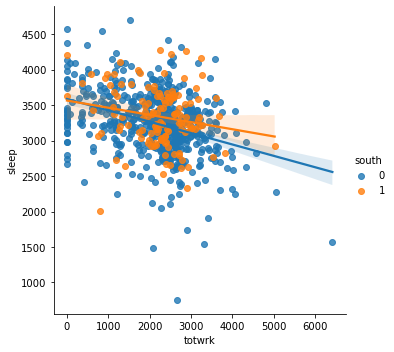

In [4]:
sns.lmplot(x='totwrk', y='sleep', hue='south', data = df)

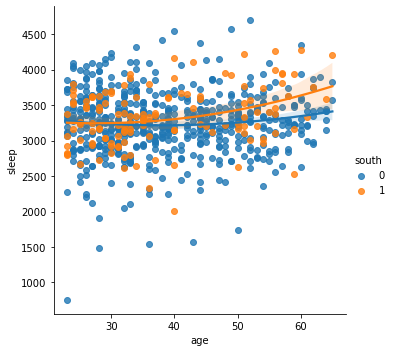

In [6]:
sns.lmplot(x='age', y='sleep',order=2, hue='south', data = df)

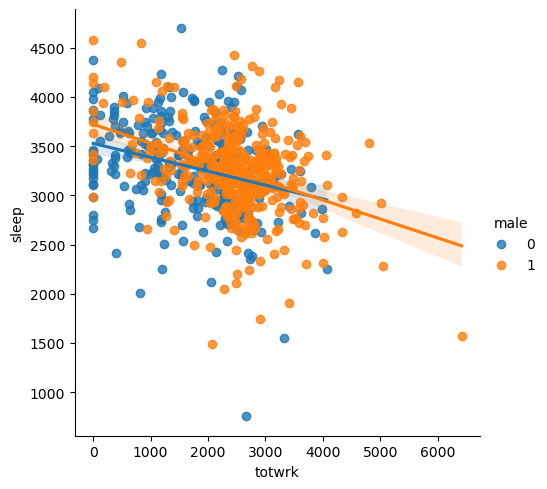

In [13]:
sns.lmplot(x='totwrk', y='sleep', hue='male', data=df);

## Задача 1.2

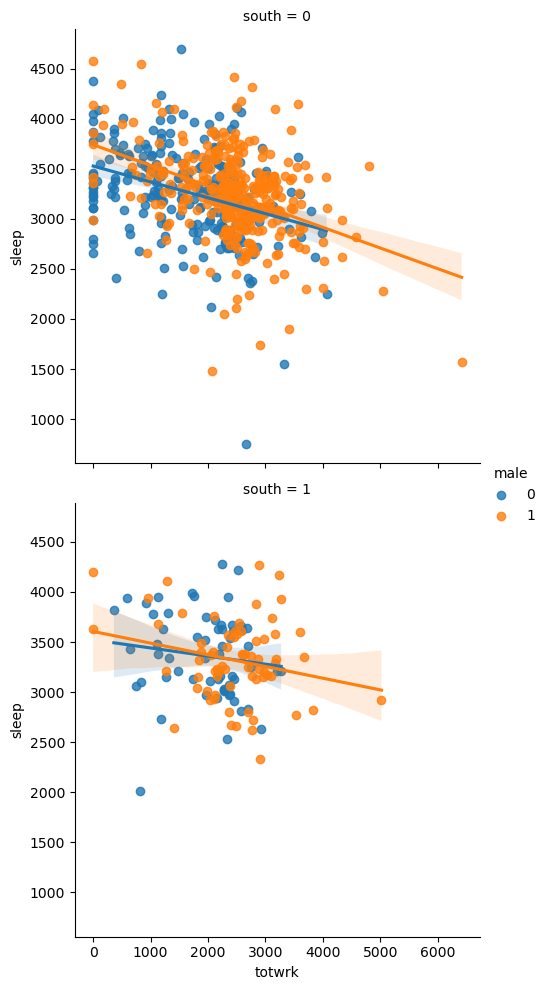

In [14]:
#row - по дополнительному признаку сортировка, запись в колонку
sns.lmplot(x='totwrk', y='sleep', hue='male', row='south', data=df);

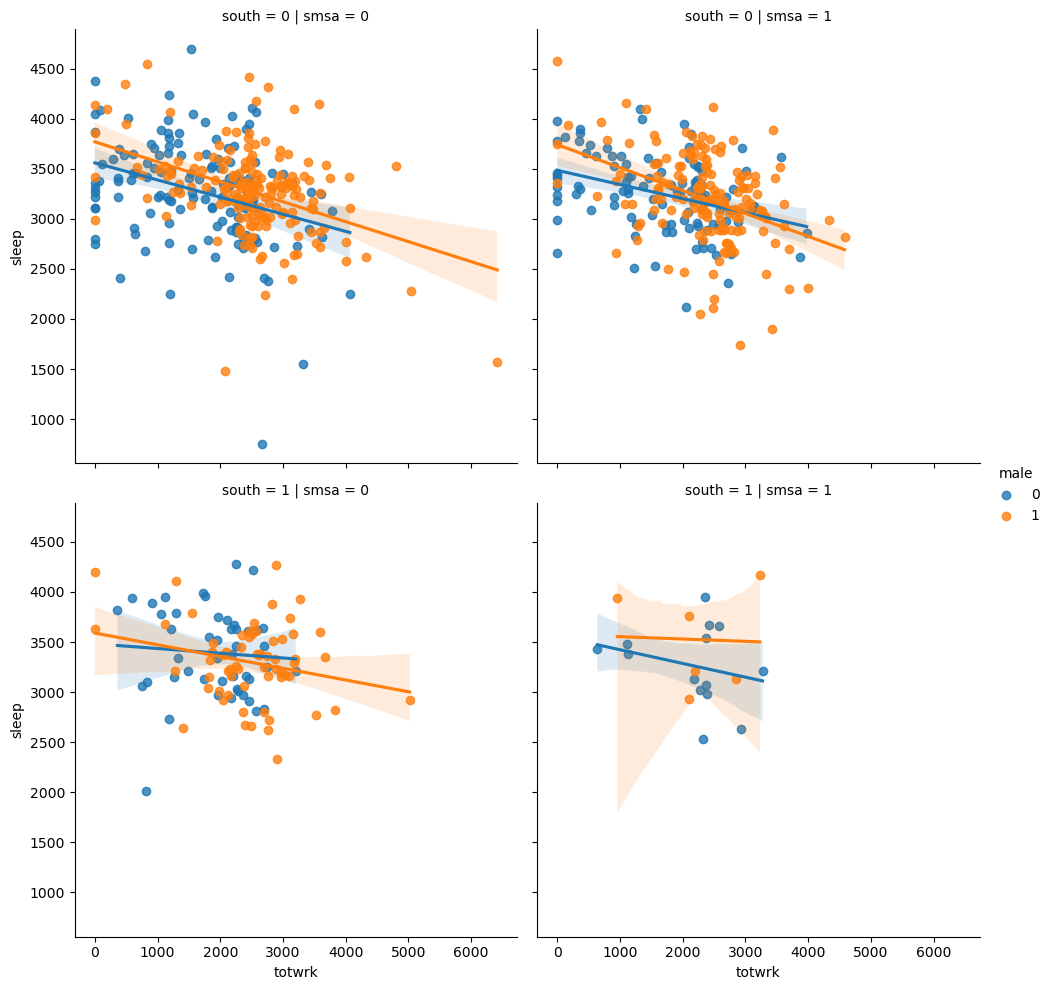

In [15]:
#row - по дополнительному признаку сортировка, запись в колонку
#col - еще одна сортировка по доп признаку, запись в строку
sns.lmplot(x='totwrk', y='sleep', hue='male', row='south', col='smsa', data=df);

In [16]:
date_string = '''R2                      0.115          0.126  '''
rest, unrest =np.float_(re.findall(r'([-+]?\d+.\d+)', date_string)) 

$$
H_0: \beta_{male} = \beta_{male*totwrk} = \beta_{age*male} = \beta_{smsa*male} = 0\\
    $$
    $$
H_1: \beta_{male}^2 + \beta_{male*totwrk}^2 + \beta_{age*male}^2 + \beta_{smsa*male}^2 > 0
    $$

In [17]:
F_obs=(unrest-rest)/(1-unrest)*(706-8)/4
F_obs

2.1962242562929055

In [18]:
alpha = 0.05 # Уровень значимости
#stats.f.ppf(alpha, q,df)
F_cr = stats.f.ppf(1-alpha,4,706-8)
F_cr

2.384692685857469

$F_obs < F_cr$ нет оснований отвергнуть нулевую гипотезу

## Задание 1.4

In [7]:
df  =  pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/wage2.csv') 
df 

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,520,40,79,28,16,6,1,30,1,1,1,0,0,1.0,11.0,NaN,6.253829
931,1202,40,102,32,13,10,3,31,1,0,1,1,7,7.0,8.0,6.0,7.091742
932,538,45,77,22,12,12,10,28,1,1,1,0,9,NaN,7.0,NaN,6.287858
933,873,44,109,25,12,12,12,28,1,0,1,0,1,1.0,NaN,11.0,6.771935


In [34]:
fitted_rest = smf.ols(data=df, formula='np.log(wage)~age+IQ+urban+married').fit()
fitted_rest.params

Intercept    4.849188
age          0.021878
IQ           0.008848
urban        0.185540
married      0.197933
dtype: float64

In [37]:
fitted_unrest = smf.ols(data=df, formula='np.log(wage)~age+IQ+urban+married+south+age:south+IQ:south+urban:south+married:south').fit()
fitted_unrest.params.round(3)

Intercept        4.914
age              0.024
IQ               0.008
urban            0.217
married          0.201
south           -0.011
age:south       -0.007
IQ:south         0.002
urban:south     -0.114
married:south   -0.003
dtype: float64

In [40]:
f_test = fitted_unrest.f_test('south=0,age:south=0, IQ:south=0, urban:south=0, married:south=0')
f_test.fvalue.round(2)

array([[3.94]])

In [41]:
alpha = 0.05
F_cr = stats.f.ppf(1-alpha, 5, len(df)-10)
F_cr

2.223779986315624

$F_obs > F_cr$ принимается гипотеза H1

## Задача 1.5

In [52]:
fitted_rest = smf.ols(data=df, formula='np.log(wage)~age+IQ+south').fit()
fitted_rest.params

Intercept    5.214017
age          0.023170
IQ           0.008266
south       -0.113453
dtype: float64

In [49]:
fitted_unrest = smf.ols(data=df, formula='np.log(wage)~age+IQ+south+urban+age:urban+IQ:urban+south:urban').fit()
fitted_unrest.params.round(3)

Intercept      4.999
age            0.024
IQ             0.008
south         -0.014
urban          0.237
age:urban     -0.001
IQ:urban      -0.000
south:urban   -0.117
dtype: float64

In [50]:
f_test = fitted_unrest.f_test('urban=0,age:urban=0, IQ:urban=0, south:urban=0')
f_test.fvalue.round(2)

array([[10.25]])

In [54]:
alpha = 0.1
F_cr = stats.f.ppf(1-alpha, 4, len(df)-8)
F_cr

1.9509328589732264

$F_obs > F_cr$ принимается гипотеза H1, структурные сдвиги значимы

## Задание 2.1

In [61]:
df=pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/Diamond.csv')
# Метод .loc[] фильтрует данные таблицы по строкам и столбцам
# Метод "df.loc[:,['carat']]" делает срез данных и означает, что из датафрейма выбираются все строки (при помощи знака ":") столбца "carat"
df_all = pd.get_dummies(df.loc[:,['carat','colour','certification','price']])
df

,carat,colour,clarity,certification,price
0,0.30,D,VS2,GIA,1302
1,0.30,E,VS1,GIA,1510
2,0.30,G,VVS1,GIA,1510
3,0.30,G,VS1,GIA,1260
4,0.31,D,VS1,GIA,1641
...,...,...,...,...,...
303,1.01,I,VS1,HRD,8175
304,1.02,F,VVS2,HRD,10796
305,1.06,H,VVS2,HRD,9890
306,1.02,H,VS2,HRD,8959


In [58]:
model_d = smf.ols(formula='np.log(price)~carat+I(carat**2)+colour_E+colour_F+colour_G+colour_H+colour_I+certification_HRD+certification_IGI',data=df_all).fit()
model_d.params

Intercept            5.866015
carat                5.667499
I(carat ** 2)       -2.153394
colour_E            -0.076348
colour_F            -0.152412
colour_G            -0.227155
colour_H            -0.313470
colour_I            -0.408190
certification_HRD    0.042463
certification_IGI    0.085451
dtype: float64

In [59]:
model_d.f_test('colour_E=colour_F=colour_G=colour_H=colour_I=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[71.54686523]]), p=5.202465260125949e-49, df_denom=298, df_num=5>

In [60]:
F_cr = stats.f.ppf(1-0.01,5,len(df_all)-5)
F_cr

3.0781046281285778

$F_obs>F_cr$ Гипотеза о совместной незначимости коэффициентов отвергается.

## Задача 2.2

In [62]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/diamonds.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [75]:
# Метод .loc[] фильтрует данные таблицы по строкам и столбцам
# Метод "df.loc[:,['carat']]" делает срез данных и означает, что из датафрейма выбираются все строки (при помощи знака ":") столбца "carat"
df_all = pd.get_dummies(df.loc[:,['cut','color','x','y','z','price','carat']])
df_all

,x,y,z,price,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,3.95,3.98,2.43,326,0.23,0,0,1,0,0,0,1,0,0,0,0,0
1,3.89,3.84,2.31,326,0.21,0,0,0,1,0,0,1,0,0,0,0,0
2,4.05,4.07,2.31,327,0.23,0,1,0,0,0,0,1,0,0,0,0,0
3,4.20,4.23,2.63,334,0.29,0,0,0,1,0,0,0,0,0,0,1,0
4,4.34,4.35,2.75,335,0.31,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,5.75,5.76,3.50,2757,0.72,0,0,1,0,0,1,0,0,0,0,0,0
53936,5.69,5.75,3.61,2757,0.72,0,1,0,0,0,1,0,0,0,0,0,0
53937,5.66,5.68,3.56,2757,0.70,0,0,0,0,1,1,0,0,0,0,0,0
53938,6.15,6.12,3.74,2757,0.86,0,0,0,1,0,0,0,0,0,1,0,0


In [76]:
#Изменение названия колонки
df_all = df_all.rename(columns={'cut_Very Good' : 'cut_VeryGood'})
df_all

,x,y,z,price,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_VeryGood,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,3.95,3.98,2.43,326,0.23,0,0,1,0,0,0,1,0,0,0,0,0
1,3.89,3.84,2.31,326,0.21,0,0,0,1,0,0,1,0,0,0,0,0
2,4.05,4.07,2.31,327,0.23,0,1,0,0,0,0,1,0,0,0,0,0
3,4.20,4.23,2.63,334,0.29,0,0,0,1,0,0,0,0,0,0,1,0
4,4.34,4.35,2.75,335,0.31,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,5.75,5.76,3.50,2757,0.72,0,0,1,0,0,1,0,0,0,0,0,0
53936,5.69,5.75,3.61,2757,0.72,0,1,0,0,0,1,0,0,0,0,0,0
53937,5.66,5.68,3.56,2757,0.70,0,0,0,0,1,1,0,0,0,0,0,0
53938,6.15,6.12,3.74,2757,0.86,0,0,0,1,0,0,0,0,0,1,0,0


In [81]:
fitted_unrest = smf.ols(data = df_all, formula ='np.log(price)~carat+I(carat**2)+cut_Good+cut_Ideal+cut_Premium+cut_VeryGood+color_E+color_F+color_G+color_H+color_I+color_J+x+y+z').fit()
fitted_unrest.params.round(3)

Intercept        3.992
carat            2.535
I(carat ** 2)   -0.646
cut_Good         0.118
cut_Ideal        0.251
cut_Premium      0.161
cut_VeryGood     0.177
color_E         -0.030
color_F         -0.039
color_G         -0.071
color_H         -0.210
color_I         -0.308
color_J         -0.432
x                0.339
y                0.015
z                0.063
dtype: float64

In [82]:
fitted_unrest.f_test('color_E=color_F=color_G=color_H=color_I=color_J=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[2282.37014779]]), p=0.0, df_denom=5.39e+04, df_num=6>

In [83]:
F_cr = stats.f.ppf(1-0.05,6,len(df_all)-16)
F_cr

2.0987650626102843

$F_obs>F_cr$ Гипотеза о совместной незначимости коэффициентов отвергается.

In [85]:
fitted_unrest.f_test('cut_Good=cut_Ideal=cut_Premium=cut_VeryGood=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[797.06646442]]), p=0.0, df_denom=5.39e+04, df_num=4>

In [86]:
F_cr = stats.f.ppf(1-0.05,4,len(df_all)-16)
F_cr

2.372096945358993

$F_obs>F_cr$ Гипотеза о совместной незначимости коэффициентов отвергается.

# List 10

## Диагностические тесты

In [88]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


In [90]:
fitted = smf.ols(data=df, formula='sleep~totwrk+age+male+smsa+south').fit()
fitted.params

Intercept    3470.460185
totwrk         -0.170220
age             2.831414
male           91.257164
smsa          -56.759172
south          99.508559
dtype: float64

In [111]:
df['pred'] = 3470.460185-0.170220*df['totwrk'] + 2.831414*df['age'] + 91.257164*df['male'] -56.759172*df['smsa'] + 99.508559*df['south']
df['resid'] = df['sleep']- df['pred']
df['pred2'] = df['pred']**2
df['pred3'] = df['pred']**3
df['pred4'] = df['pred']**4
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,exper,yngkid,yrsmarr,hrwage,agesq,pred,resid,pred2,pred3,pred4
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,14,0,13,7.070004,1024,3067.106237,45.893763,9.407141e+06,2.885270e+10,8.849430e+13
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,11,0,0,1.429999,961,2894.495342,25.504658,8.378103e+06,2.425038e+10,7.019261e+13
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,21,0,0,20.529997,1936,3150.371093,-480.371093,9.924838e+06,3.126692e+10,9.850241e+13
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,12,0,12,9.619998,900,2910.949685,172.050315,8.473628e+06,2.466630e+10,7.180237e+13
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,44,0,33,2.750000,4096,3303.760245,144.239755,1.091483e+07,3.605999e+10,1.191336e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,27,0,18,NaN,2025,3196.248923,-211.248923,1.021601e+07,3.265290e+10,1.043668e+14
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,18,0,4,NaN,1156,3543.086925,-23.086925,1.255346e+07,4.447802e+10,1.575895e+14
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,19,0,17,NaN,1369,3260.145283,249.854717,1.062855e+07,3.465061e+10,1.129660e+14
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,31,0,22,NaN,2916,3389.063680,-419.063680,1.148575e+07,3.892595e+10,1.319225e+14


In [98]:
slp = smf.ols(data=df, formula = 'sleep~totwrk+age+male+smsa+south').fit()
slp.params.round(3)

Intercept    3470.460
totwrk         -0.170
age             2.831
male           91.257
smsa          -56.759
south          99.509
dtype: float64

In [143]:
slp_unrest = smf.ols(data=df, formula = 'sleep~totwrk+age+male+smsa+south+pred2+pred3+pred4').fit()
slp_unrest.params.round(3)

Intercept   -0.000
totwrk      -0.007
age          0.273
male         1.417
smsa        -2.968
south       -2.990
pred2        0.001
pred3       -0.000
pred4       -0.000
dtype: float64

<AxesSubplot:xlabel='pred', ylabel='sleep'>

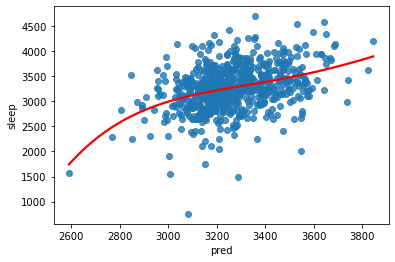

In [149]:
sns.regplot(data = df ,  y = 'sleep' ,  x = 'pred' , order=4, ci = None ,  line_kws = { "color":"r"}) 

In [144]:
slp_rest = smf.ols(data=df, formula = 'sleep~totwrk+age+male+smsa+south').fit()
slp_rest.params.round(3)

Intercept    3470.460
totwrk         -0.170
age             2.831
male           91.257
smsa          -56.759
south          99.509
dtype: float64

In [145]:
#F observated для гипотезы о регресорах
F_obs = (slp_unrest.rsquared - slp_rest.rsquared)/(1-slp_unrest.rsquared)*(len(df)-10)/3
F_obs.round(2)

0.55

In [147]:
stats.f.ppf(1-0.05,3,len(df)-9)

2.617681608789195

#### F_cr > F_obs - регрессия согласуется с данными.

In [166]:
f_test = slp_unrest.f_test('pred2=pred3=pred4=0')
f_test.fvalue

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


array([[56.87434148]])

### Руслан Юрьевич, почему не сходится тут Fнабл с тем, что получается у Никиты Вячеславовича?

## Задача 1.5

In [155]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/Labour.csv')
df

,capital,labour,output,wage
0,2.606563,184,9.250759,43.080307
1,1.323237,91,3.664310,27.780016
2,22.093692,426,28.781516,44.467748
3,10.737851,72,4.124642,39.734710
4,1.161365,46,2.890150,34.650709
...,...,...,...,...
564,2.625403,20,1.424376,33.477545
565,1.276386,61,2.109048,26.300732
566,1.953869,117,6.241870,41.153979
567,1.318527,46,7.902237,66.720139


In [157]:
fitted = smf.ols(data=df, formula = 'np.log(output)~np.log(capital)+labour+I(labour**2)+np.log(wage)').fit()
fitted.params.round(4)

Intercept         -1.8004
np.log(capital)    0.3346
labour             0.0020
I(labour ** 2)    -0.0000
np.log(wage)       0.7942
dtype: float64

In [161]:
df['pred'] = -1.8004+0.3346*np.log(df['capital']) + 0.0020*df['labour'] -0.0000*df['labour']**2 + 0.7942*np.log(df['wage']**2)
df['resid'] = np.log(df['output'])- df['pred']
df['pred2'] = df['pred']**2
df['pred3'] = df['pred']**3
df['pred4'] = df['pred']**4
df

,capital,labour,output,wage,pred,resid,pred2,pred3,pred4
0,2.606563,184,9.250759,43.080307,4.865412,-2.640706,23.672231,115.175152,560.374535
1,1.323237,91,3.664310,27.780016,3.755660,-2.457020,14.104982,52.973519,198.950527
2,22.093692,426,28.781516,44.467748,6.114888,-2.755155,37.391857,228.647022,1398.150961
3,10.737851,72,4.124642,39.734710,4.986711,-3.569732,24.867291,124.006006,618.382171
4,1.161365,46,2.890150,34.650709,3.973038,-2.911730,15.785032,62.714534,249.167234
...,...,...,...,...,...,...,...,...,...
564,2.625403,20,1.424376,33.477545,4.139241,-3.785507,17.133317,70.918931,293.550554
565,1.276386,61,2.109048,26.300732,3.596681,-2.850444,12.936112,46.527067,167.343006
566,1.953869,117,6.241870,41.153979,4.562311,-2.731031,20.814682,94.963051,433.250970
567,1.318527,46,7.902237,66.720139,5.056207,-2.989061,25.565230,129.263093,653.580960


In [162]:
output_unrest = smf.ols(data=df, formula = 'np.log(output)~np.log(capital)+labour+I(labour**2)+np.log(wage)+pred2+pred3+pred4').fit()
output_unrest.params.round(3)

Intercept         -13.719
np.log(capital)     1.351
labour              0.012
I(labour ** 2)     -0.000
np.log(wage)        6.129
pred2              -0.635
pred3               0.041
pred4              -0.001
dtype: float64

In [163]:
#F observated для гипотезы о регресорах
F_obs = (output_unrest.rsquared - fitted.rsquared)/(1-output_unrest.rsquared)*(len(df)-8)/3
F_obs.round(2)

53.96

In [165]:
F_cr=stats.f.ppf(1-0.05,3,len(df)-8)
F_cr

2.6207893757624725

#### F_cr < F_obs - регрессия не согласуется с данными. Есть какие-то регрессоры, которые не учтены